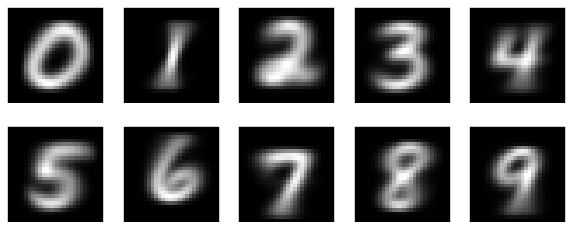

In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset from Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize images from 28x28 to 784
x_train = (x_train.astype('float32') / 255.).reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = (x_test.astype('float32') / 255.).reshape((len(x_test), np.prod(x_test.shape[1:])))

# Plot the mean of each character
plt.figure(figsize=(10, 4))
for digit in range(10):
    ax = plt.subplot(2, 5, digit + 1)
    mean_digit = x_train[y_train == digit].mean(axis=0)
    plt.imshow(mean_digit.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.savefig('mean_digits.png', dpi=200)
plt.show()

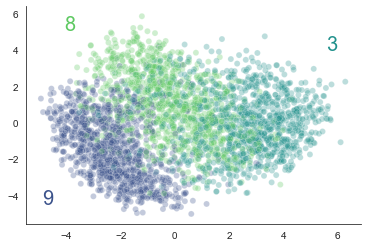

In [2]:
from sklearn.decomposition import PCA
import seaborn as sns

# Restrict the dataset to 3, 8, and 9
train_conditions = (y_train == 3) | (y_train == 8) | (y_train == 9)
test_conditions = (y_test == 3) | (y_test == 8) | (y_test == 9)
x_train = x_train[train_conditions]; y_train = y_train[train_conditions]
x_test = x_test[test_conditions]; y_test = y_test[test_conditions]

# Apply PCA to reduce the dimension to 2
pca = PCA(n_components=2).fit(x_train)
pca_images = pca.transform(x_test)

# Plot the latent space colored by label
sns.set_style('white'); sns.set_palette('viridis', 3)
sns.scatterplot(x=pca_images.T[0], y=pca_images.T[1], hue=y_test.astype('str'), alpha=0.3)

# Add labels to the plot
viridis = sns.color_palette('viridis', 3)
plt.text(-4.9, -4.5, '9', size=20, color=viridis[0])
plt.text(5.6, 4, '3', size=20, color=viridis[1])
plt.text(-4.1, 5.1, '8', size=20, color=viridis[2])
plt.legend().remove()

# Final adjustments to the plot
sns.despine()
plt.savefig('and_or_gates.png', dpi=200); plt.show()